In [1]:
import pandas as pd
import numpy as np

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Activation
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# tag list
tag_file=pd.read_csv("tags.csv")
tag=tag_file["tagID"]
tag=list(tag)

# user_code
user_tag_file=pd.read_csv("user_tags.csv")
company_tag_file=pd.read_csv("job_tags.csv")

# user_code 작성
list_of_user=list(set(user_tag_file["userID"]))
user_code={}
for user in list_of_user:
    user_code[user]=[0 for i in range(887)]

sizeOfUserTag=len(user_tag_file)
for i in range(sizeOfUserTag):
    tag_id_of_user=user_tag_file["tagID"][i]
    index_of_tag_user=tag.index(tag_id_of_user)  
    user_code[user_tag_file["userID"][i]][index_of_tag_user]=1
    
# company_code 작성
list_of_company=list(set(company_tag_file["jobID"]))    
company_code={}
for company in list_of_company:
    company_code[company]=[0 for i in range(887)]

sizeOfCompanyTag=len(company_tag_file)
for i in range(sizeOfCompanyTag):
    tag_id_of_company=company_tag_file["tagID"][i]
    index_of_tag_company=tag.index(tag_id_of_company)
    company_code[company_tag_file["jobID"][i]][index_of_tag_company]=1

In [3]:
train_file=pd.read_csv("train.csv")
size_input=len(train_file)
X_train=[]
y_train=[]

for i in range(size_input):
    userL=user_code[train_file["userID"][i]]
    companyL=company_code[train_file["jobID"][i]]
    tempL=userL+companyL
    X_train.append(tempL)
    y_train.append([train_file["applied"][i]])
    
X_train=np.array(X_train)
y_train=np.array(y_train)

In [4]:
def my_model(X_train,Y_train,x_degree):
    input_X = keras.Input(shape=(x_degree,),name="input_layer")
    output_model = layers.Dense(8, activation='relu',name="hidden_layer1")(input_X)
    #output_model = layers.Dense(8, activation='relu',name="hidden_layer2")(output_model)
    output_model = layers.Dense(1, activation='sigmoid',name="output_layer")(output_model)

    model = keras.Model(inputs=input_X,
                        outputs=output_model)

    model.compile(optimizer="adam",
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # starts training
    hist=model.fit(X_train,Y_train,
                   batch_size=50,
                   validation_split=0.4,
                   epochs=300,
                   verbose=1,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)],
                   shuffle=True)
    
    return hist,model

def model_summary(model):
    model.summary()
    
def grapviz(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    return plt.show()


In [5]:
hist,model=my_model(X_train[:4000],y_train[:4000],len(X_train[0]))

Train on 2400 samples, validate on 1600 samples
Epoch 1/300
2400/2400 [==============================] - 1s 413us/sample - loss: 0.5186 - accuracy: 0.8462 - val_loss: 0.4447 - val_accuracy: 0.8450
Epoch 2/300
2400/2400 [==============================] - 0s 60us/sample - loss: 0.4152 - accuracy: 0.8604 - val_loss: 0.4351 - val_accuracy: 0.8450
Epoch 3/300
2400/2400 [==============================] - 0s 57us/sample - loss: 0.4001 - accuracy: 0.8604 - val_loss: 0.4273 - val_accuracy: 0.8450
Epoch 4/300
2400/2400 [==============================] - 0s 55us/sample - loss: 0.3874 - accuracy: 0.8604 - val_loss: 0.4220 - val_accuracy: 0.8450
Epoch 5/300
2400/2400 [==============================] - 0s 57us/sample - loss: 0.3777 - accuracy: 0.8604 - val_loss: 0.4182 - val_accuracy: 0.8450
Epoch 6/300
2400/2400 [==============================] - 0s 56us/sample - loss: 0.3686 - accuracy: 0.8604 - val_loss: 0.4157 - val_accuracy: 0.8450
Epoch 7/300
2400/2400 [==============================] - 0s 57u

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1774)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 8)                 14200     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9         
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


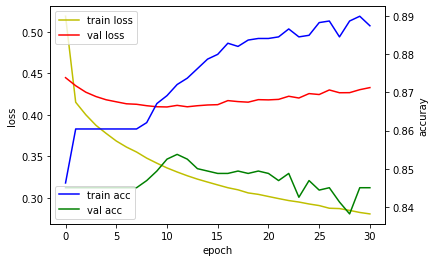

In [6]:
model_summary(model)
grapviz(hist)

In [7]:
score = model.evaluate(X_train[4000:], y_train[4000:])
print('test_loss: ', score[0])
print('test_acc: ', score[1])

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_loss:  0.4155254330635071
test_acc:  0.862


In [8]:
model.save("donghyun_model.h5")